<a href="https://colab.research.google.com/github/sweetmjkim/study_AIs/blob/main/docs/quests/NLPs/Q_wordcloud_regexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quests
- Oneword Game을 wordcloud
- 본인 작성 내용만 변환(values(list) 활용)
- option] 상위 30단어만 표시

## 데이터 가지고 오기

In [1]:
# 한글 처리
# !apt-get -y install fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_OWG = pd.read_excel('/content/OneWord_Game.xlsx', sheet_name=None)
df_OWG_ALL = pd.concat(df_OWG.values(), axis=1)
df_OWG_text = df_OWG_ALL.loc[6]
df_OWG_text

                                                                     김명준
2024-02-16 00:00:00    자연어 처리\n컴퓨터가 인간의 언어를 이해하고 처리하는 기술을 말한다.\n컴퓨터를 ...
2024-02-15 00:00:00    지도학습\n컴퓨터에게 문제와 정답을 모두 알려주고 공부시키는 머신러닝의 일종이다.\...
2024-02-14 00:00:00    머신러닝\n인간의 학습 능력과 같은 기능을 컴퓨터에서 실현하고자 하는 기술 및 기법...
2024-02-13 00:00:00    귀무가설\n차이가 없거나 의미있는 차이가 없는 경우의 가설이다.\n실험이나 연구를 ...
2024-02-07 00:00:00    대립가설\n새로운 결과나 주장을 '참'이라는 걸 입증하기위한 가설이다.\n확률적으로...
2024-02-06 00:00:00    p-value\n확률을 측정한것이다. 0.05 이하면 통계적으로 유의하다고 판단한다...
2024-02-05 00:00:00    seaborn\n그래프를 매우 쉽게 표현할 수 있도록 돕는 시각화 라이브러리이다.\...
2024-02-02 00:00:00    pandas boxplot\n데이터의 통계적의미를 표현하기위해 주로 사용한다.\n데...
2024-02-01 00:00:00    Series\n1열로만 이루어진 자료구조이다.(index + value)\n각 셀에...
                                                                     김명준
2024-01-31 00:00:00    datetime\n날짜와 시간을 다루기 위한 클래스와 함수를 제공한다.\n현재 날짜...
2024-01-30 00:00:00    numpy\n행열연산에 특화된 라이브러리이다.\nlist에 비해서 빠른 연산을 지원...
2024-01-29 00:00:00    colab\n브라우저 내에서 python 스크립트를

In [4]:
df_sheets = []
for sheet_name, df in df_OWG_text.items():
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass

len(df_sheets)      # 갯수 확인

            , <class 'str'>
2024-02-16 00:00:00, <class 'str'>
2024-02-15 00:00:00, <class 'str'>
2024-02-14 00:00:00, <class 'str'>
2024-02-13 00:00:00, <class 'str'>
2024-02-07 00:00:00, <class 'str'>
2024-02-06 00:00:00, <class 'str'>
2024-02-05 00:00:00, <class 'str'>
2024-02-02 00:00:00, <class 'str'>
2024-02-01 00:00:00, <class 'str'>
            , <class 'str'>
2024-01-31 00:00:00, <class 'str'>
2024-01-30 00:00:00, <class 'str'>
2024-01-29 00:00:00, <class 'str'>
2024-01-26 00:00:00, <class 'str'>
1월 25일, <class 'str'>
1월 24일, <class 'str'>
1월 23일, <class 'str'>
1월 22일, <class 'str'>
1월 19일, <class 'str'>
1월 18일, <class 'str'>
1월 17일, <class 'str'>
1월 16일, <class 'str'>
1월 15일, <class 'str'>
1월 12일, <class 'str'>
1월 11일, <class 'float'>
1월 10일, <class 'str'>
1월 9일, <class 'str'>
1월 8일, <class 'str'>
1월 5일, <class 'str'>
1월 4일, <class 'str'>
1월 3일, <class 'str'>
1월 2일, <class 'str'>
      , <class 'str'>
12월 29일, <class 'str'>
12월 28일, <class 'str'>
12월 27일, <class 'str'>
12월 26

48

In [5]:
text = ''.join(map(str, df_sheets))
text

"김명준자연어 처리\n컴퓨터가 인간의 언어를 이해하고 처리하는 기술을 말한다.\n컴퓨터를 이용해 인간 언어 이해, 생성 및 분석을 다루기 위한 목적이다.지도학습\n컴퓨터에게 문제와 정답을 모두 알려주고 공부시키는 머신러닝의 일종이다.\n데이터가 주어졌을 때 레이블을 출력하도록 하는 함수를 학습하는 것이 목적이다.머신러닝\n인간의 학습 능력과 같은 기능을 컴퓨터에서 실현하고자 하는 기술 및 기법이다.다양한 판단 및 예측을 수행하기위해 사용된다.귀무가설\n차이가 없거나 의미있는 차이가 없는 경우의 가설이다.\n실험이나 연구를 통해 기각시키고자 사용한다.대립가설\n새로운 결과나 주장을 '참'이라는 걸 입증하기위한 가설이다.\n확률적으로 받아 들이는것이 양적 연구를 수행하는 목적이다.p-value\n확률을 측정한것이다. 0.05 이하면 통계적으로 유의하다고 판단한다.\n관찰된 데이터의 검정통계량이 대립가설을 지지하는 정도를 확률로 표현하기위해 사용한다.seaborn\n그래프를 매우 쉽게 표현할 수 있도록 돕는 시각화 라이브러리이다.\n분포도, 선형그래프, 범주형그래프등과 같이 그래프 그리기가 용이하기에 사용한다.pandas boxplot\n데이터의 통계적의미를 표현하기위해 주로 사용한다.\n데이터에 이상값을 식별하고 처리함으로써 데이터의 정확성과 신뢰성을 높여준다.Series\n1열로만 이루어진 자료구조이다.(index + value)\n각 셀에는 서로 다른 모든 자료형을 넣을 수 있고, 다차원 배열도 넣을 수 있다.김명준datetime\n날짜와 시간을 다루기 위한 클래스와 함수를 제공한다.\n현재 날짜와 시간을 가져오고 또 다른 날짜와 시간을 생성하고 연산하며 비교 할수 있다.\n대표적으로 datetime, datedelta를 사용한다.numpy\n행열연산에 특화된 라이브러리이다.\nlist에 비해서 빠른 연산을 지원하고 메모리를 효율적으로 사용할수 있다. 수리 목적에 특화되어있다.colab\n브라우저 내에서 python 스크립트를 작성하고 실행한다.\n무료이며 클

In [6]:
# 조사 빼기
import re
patterns = r'(|김명준|가 |의 |를 |하고 |하는 |을 |및 |이다.|면 |한다|이 |과|Series|시키는|하고자|에서|seaborn|알려주고|주어졌때|있도록|위해|하도록|있다|있고|나 |으로 |\.|\,|\n)'
text_regex = re.sub(pattern=patterns, repl='', string=text)
text_regex

"자연어 처리컴퓨터인간언어이해처리기술말컴퓨터이용해 인간 언어 이해 생성 분석다루기 위한 목적지도학습컴퓨터에게 문제와 정답모두  공부 머신러닝일종데이터주어졌때 레이블출력 함수학습것목적머신러닝인간학습 능력 같은 기능컴퓨터 실현 기술 기법다양한 판단 예측수행하기 사용된다귀무가설차이없거의미있는 차이없는 경우가설실험이연구통해 기각시키고자 사용대립가설새로운 결주장'참'이라는 걸 입증하기위한 가설확률적받아 들이는것양적 연구수행목적p-value확률측정한것 005 이하통계적유의하다고 판단관찰된 데이터검정통계량대립가설지지정도확률로 표현하기 사용그래프매우 쉽게 표현할 수  돕는 시각화 라이브러리분포도 선형그래프 범주형그래프등 같그래프 그리기용이하기에 사용pandas boxplot데이터통계적의미표현하기 주로 사용데이터에 이상값식별처리함으로써 데이터정확성 신뢰성높여준다1열로만 이루어진 자료구조(index + value)각 셀에는 서로 다른 모든 자료형넣수  다차원 배열도 넣수 datetime날짜와 시간다루기 위한 클래스와 함수제공현재 날짜와 시간가져오고 또 다른 날짜와 시간생성연산하며 비교 할수 대표적datetime datedelta사용numpy행열연산에 특화된 라이브러리list에 비해서 빠른 연산지원메모리효율적사용할수  수리 목적에 특화되어colab브라우저 내 python 스크립트작성실행무료이며 클라우드 기반 GUI방식 협업기능 등 다양한 역활 기능Pandas시리즈와 데이터프레임구조화된 데이터형식구성되어대용량 데이터처리하는데 최적화되어자바스크립트 - 콜백함수개발자는 단지 함수 등록만이벤트발생하거특정시점에 도달했을때 시스템호출되는 함수클릭 같은 이벤트처리하기  등록이벤트 리스너대표적자바스크립트주로 웹브라우저내 실행스크립트 언어사용자 상호작용 애니메이션 실시간 업데이터 등구현하는데 중요한 역할json전송 데이터속성 값나열해서 표현형식형식단순하여 자바와 같은 대부분프로그래밍 언어도 쉽게 사용할수데이터웹애플리케이션에 전송할때 주로 사용postman 툴개발자들API디자인 테스트반복API 플

In [7]:
text_split = text_regex.split()
text_split[:2], len(text_split)

(['자연어', '처리컴퓨터인간언어이해처리기술말컴퓨터이용해'], 318)

In [8]:
from collections import Counter
text_split_counter = Counter(text_split)
text_split_counter

Counter({'자연어': 1,
         '처리컴퓨터인간언어이해처리기술말컴퓨터이용해': 1,
         '인간': 1,
         '언어': 1,
         '이해': 1,
         '생성': 1,
         '분석다루기': 1,
         '위한': 3,
         '목적지도학습컴퓨터에게': 1,
         '문제와': 1,
         '정답모두': 1,
         '공부': 1,
         '머신러닝일종데이터주어졌때': 1,
         '레이블출력': 1,
         '함수학습것목적머신러닝인간학습': 1,
         '능력': 1,
         '같은': 3,
         '기능컴퓨터': 1,
         '실현': 1,
         '기술': 1,
         '기법다양한': 1,
         '판단': 1,
         '예측수행하기': 1,
         '사용된다귀무가설차이없거의미있는': 1,
         '차이없는': 1,
         '경우가설실험이연구통해': 1,
         '기각시키고자': 1,
         '사용대립가설새로운': 1,
         "결주장'참'이라는": 1,
         '걸': 1,
         '입증하기위한': 1,
         '가설확률적받아': 1,
         '들이는것양적': 1,
         '연구수행목적p-value확률측정한것': 1,
         '005': 1,
         '이하통계적유의하다고': 1,
         '판단관찰된': 1,
         '데이터검정통계량대립가설지지정도확률로': 1,
         '표현하기': 1,
         '사용그래프매우': 1,
         '쉽게': 3,
         '표현할': 1,
         '수': 1,
         '돕는': 1,
         '시각화': 1,
        

In [9]:
from wordcloud import WordCloud

In [10]:
wordCloud = WordCloud(background_color='white'
                      , font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(text_split_counter)

In [11]:
wordCloud.words_

{'모든': 1.0,
 '위한': 0.75,
 '같은': 0.75,
 '쉽게': 0.75,
 '주로': 0.5,
 '다른': 0.5,
 '날짜와': 0.5,
 '할수': 0.5,
 '-': 0.5,
 '수정': 0.5,
 '웹': 0.5,
 '구성된': 0.5,
 '크롤링중인': 0.5,
 '셀레니움명령어웹': 0.5,
 '자연어': 0.25,
 '처리컴퓨터인간언어이해처리기술말컴퓨터이용해': 0.25,
 '인간': 0.25,
 '언어': 0.25,
 '이해': 0.25,
 '생성': 0.25,
 '분석다루기': 0.25,
 '목적지도학습컴퓨터에게': 0.25,
 '문제와': 0.25,
 '정답모두': 0.25,
 '공부': 0.25,
 '머신러닝일종데이터주어졌때': 0.25,
 '레이블출력': 0.25,
 '함수학습것목적머신러닝인간학습': 0.25,
 '능력': 0.25,
 '기능컴퓨터': 0.25,
 '실현': 0.25,
 '기술': 0.25,
 '기법다양한': 0.25,
 '판단': 0.25,
 '예측수행하기': 0.25,
 '사용된다귀무가설차이없거의미있는': 0.25,
 '차이없는': 0.25,
 '경우가설실험이연구통해': 0.25,
 '기각시키고자': 0.25,
 '사용대립가설새로운': 0.25,
 "결주장'참'이라는": 0.25,
 '걸': 0.25,
 '입증하기위한': 0.25,
 '가설확률적받아': 0.25,
 '들이는것양적': 0.25,
 '연구수행목적p-value확률측정한것': 0.25,
 '005': 0.25,
 '이하통계적유의하다고': 0.25,
 '판단관찰된': 0.25,
 '데이터검정통계량대립가설지지정도확률로': 0.25,
 '표현하기': 0.25,
 '사용그래프매우': 0.25,
 '표현할': 0.25,
 '수': 0.25,
 '돕는': 0.25,
 '시각화': 0.25,
 '라이브러리분포도': 0.25,
 '선형그래프': 0.25,
 '범주형그래프등': 0.25,
 '같그래프': 0.25,
 '그리기용이하기에': 0.25,
 '사용p

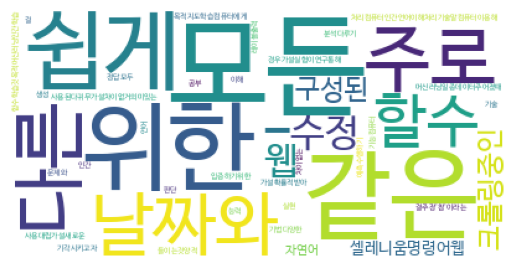

In [12]:
import matplotlib.pyplot as plt     # 낱말구름(wordCloud) 나타내기
plt.imshow(wordCloud)
plt.axis('off')         # x,y 축 눈금 삭제
plt.show()